<a href="https://colab.research.google.com/github/Tejasri-Pendota/Open-source-Practice/blob/main/predictioneer_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
filepath = '/content/train_data.xlsx - Sheet1.csv'

In [40]:
# prompt: now remove rows with no value in Lat and Long_ col

import pandas as pd

filepath = '/content/train_data.xlsx - Sheet1.csv'
df = pd.read_csv(filepath)
print(df.shape)
# Remove rows where 'Lat' or 'Long_' is empty or NaN
df = df.dropna(subset=['Lat', 'Long_'])

# Reset index after removing rows
df = df.reset_index(drop=True)

# Now you can work with the cleaned DataFrame 'df'
df

(4016, 4)


,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
3920,31.952200,35.233200,NaN,0.811686
3921,39.904200,116.407400,0.0,0.000000
3922,15.552727,48.516388,NaN,18.074508
3923,-13.133897,27.849332,NaN,1.201603


In [41]:
df.shape

(3925, 4)

In [42]:
# prompt: now  give code only for - remove row with CFR greater than 100

df = df[df['Case_Fatality_Ratio'] <= 100]
df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
3920,31.952200,35.233200,NaN,0.811686
3921,39.904200,116.407400,0.0,0.000000
3922,15.552727,48.516388,NaN,18.074508
3923,-13.133897,27.849332,NaN,1.201603


In [50]:
df['Deaths'].isnull().sum()

1545

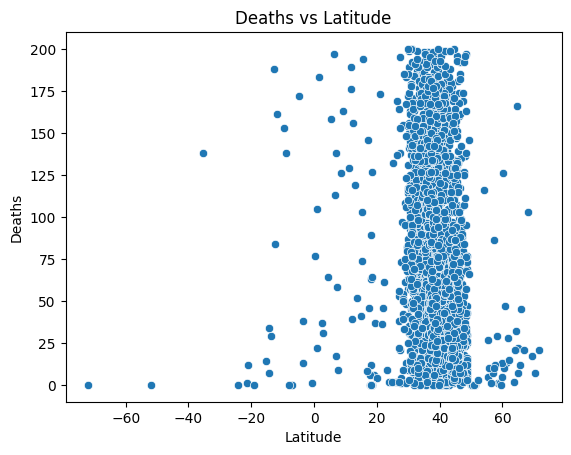

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['Lat'], y=df['Deaths'])
plt.title('Deaths vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Deaths')
plt.show()


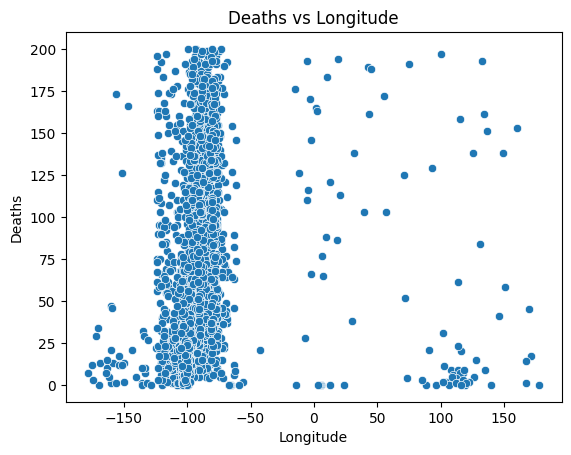

In [45]:
sns.scatterplot(x=df['Long_'], y=df['Deaths'])
plt.title('Deaths vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Deaths')
plt.show()

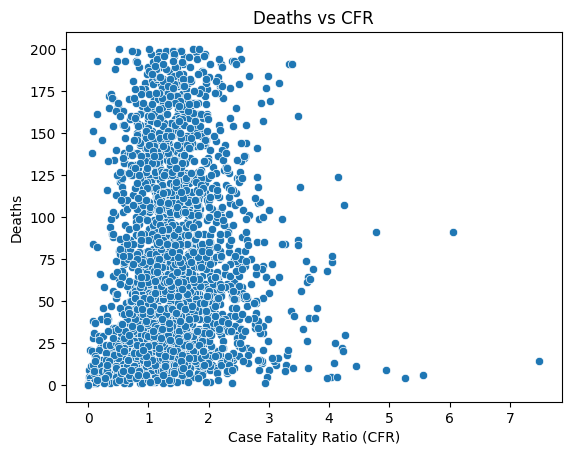

In [46]:
sns.scatterplot(x=df['Case_Fatality_Ratio'], y=df['Deaths'])
plt.title('Deaths vs CFR')
plt.xlabel('Case Fatality Ratio (CFR)')
plt.ylabel('Deaths')
plt.show()


Correlation between Deaths and Latitude: -0.010343043666829286
Correlation between Deaths and Longitude: 0.0025494292566077


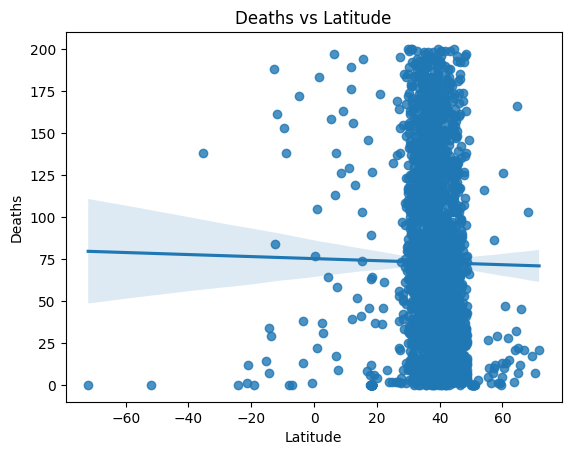

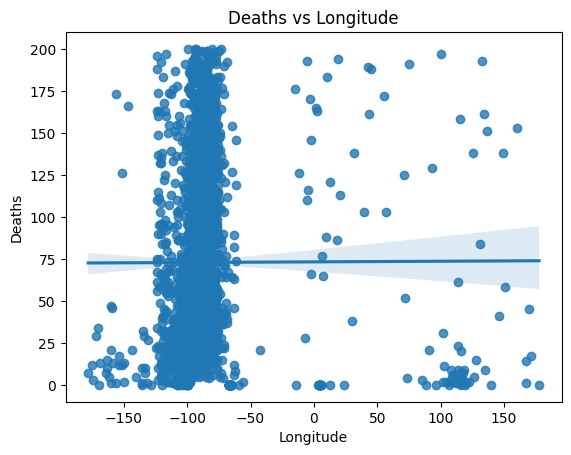

In [47]:
# Remove rows where 'Lat', 'Long_', or 'Deaths' is empty or NaN
data = df
data = data.dropna(subset=['Lat', 'Long_', 'Deaths'])

# Reset index after removing rows
data = data.reset_index(drop=True)

# Filter out unrealistic Case_Fatality_Ratio values (above 100%)
data = data[data['Case_Fatality_Ratio'] <= 100]

# Calculate the correlation between 'Deaths' and 'Lat'
correlation_lat = data['Deaths'].corr(data['Lat'])
print(f"Correlation between Deaths and Latitude: {correlation_lat}")

# Calculate the correlation between 'Deaths' and 'Long_'
correlation_long = data['Deaths'].corr(data['Long_'])
print(f"Correlation between Deaths and Longitude: {correlation_long}")


# Visualize the relationships using scatter plots with regression lines
sns.regplot(x=data['Lat'], y=data['Deaths'])
plt.title('Deaths vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Deaths')
plt.show()

sns.regplot(x=data['Long_'], y=data['Deaths'])
plt.title('Deaths vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Deaths')
plt.show()

In [51]:
df['Deaths'].isnull().sum()

1545

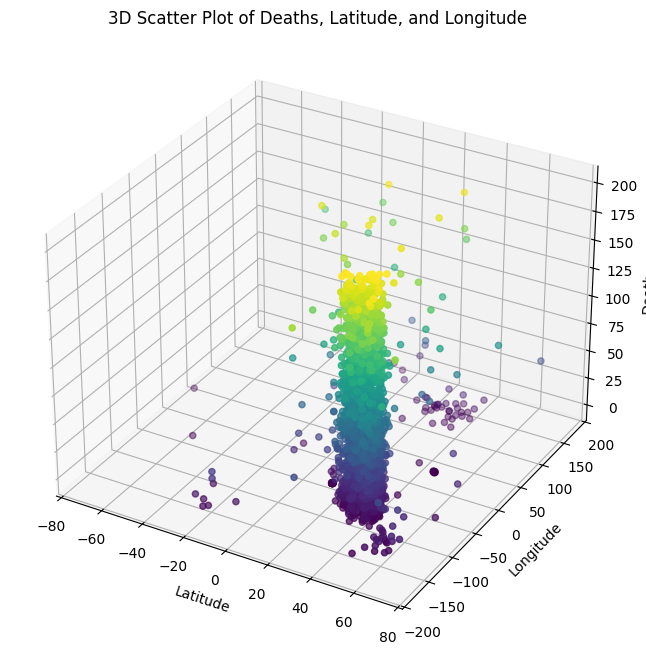

In [52]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of Deaths, Latitude, and Longitude
ax.scatter(df['Lat'], df['Long_'], df['Deaths'], c=df['Deaths'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Deaths')
ax.set_title('3D Scatter Plot of Deaths, Latitude, and Longitude')

# Display the plot
plt.show()

In [53]:
# prompt: provide relationship bln Deaths  and both Lat ,Long_ from the bove plot

# Calculate the correlation between 'Deaths' and 'Lat'
correlation_lat = df['Deaths'].corr(df['Lat'])
print(f"Correlation between Deaths and Latitude: {correlation_lat}")

# Calculate the correlation between 'Deaths' and 'Long_'
correlation_long = df['Deaths'].corr(df['Long_'])
print(f"Correlation between Deaths and Longitude: {correlation_long}")

Correlation between Deaths and Latitude: -0.010343043666829286
Correlation between Deaths and Longitude: 0.0025494292566077


In [54]:
from sklearn.impute import KNNImputer

# Select relevant columns
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
df[['Lat', 'Long_', 'Deaths']] = imputer.fit_transform(df[['Lat', 'Long_', 'Deaths']])


<ipython-input-54-8bd67ea7c0b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Lat', 'Long_', 'Deaths']] = imputer.fit_transform(df[['Lat', 'Long_', 'Deaths']])


In [55]:
df['Deaths']


,Deaths
0,64.6
1,72.0
2,140.6
3,165.0
4,109.8
...,...
3920,124.8
3921,0.0
3922,130.8
3923,127.6


In [56]:
df['Deaths'].isnull().sum()

0

In [57]:
# prompt: now add a new column names  Confirmed , which is equal to (Deaths/Case_Fatality_Ratio)*100

# Calculate 'Confirmed' column
df['Confirmed'] = (df['Deaths'] / df['Case_Fatality_Ratio']) * 100
df


<ipython-input-57-f58e6113a4ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Confirmed'] = (df['Deaths'] / df['Case_Fatality_Ratio']) * 100


,Lat,Long_,Deaths,Case_Fatality_Ratio,Confirmed
0,33.939110,67.709953,64.6,3.779217,1709.348917
1,41.153300,20.168300,72.0,1.077234,6683.786431
2,28.033900,1.659600,140.6,2.536905,5542.185960
3,42.506300,1.521800,165.0,0.345543,47751.000004
4,-11.202700,17.873900,109.8,1.836434,5978.979792
...,...,...,...,...,...
3920,31.952200,35.233200,124.8,0.811686,15375.412474
3921,39.904200,116.407400,0.0,0.000000,NaN
3922,15.552727,48.516388,130.8,18.074508,723.671144
3923,-13.133897,27.849332,127.6,1.201603,10619.148505
